# 疫情趋势-全球数据

In [228]:
import numpy as np
import pandas as pd

# 导入matplotlib库中的额pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
# 让图表直接在Jupyter notebook中展示出来
%matplotlib inline

# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# # pyecharts
# from pyecharts.charts import Bar
# from pyecharts import options as opts
# # 内置主题类型可查看 pyecharts.globals.ThemeType
# from pyecharts.globals import ThemeType

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          # 解决负号无法正常显示的问题
          'axes.unicode_minus': False,
          # 解决中文乱码问题
          'font.sans-serif': ['SimHei']}
plt.rcParams.update(params)
# 默认设置下matplotlib做出来的图标不是很清晰，可以将图表设置成矢量格式显示
%config InlineBackend.figure_format = 'svg'

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.1
0.9.0


,currentConfirmedCount,confirmedCount,deadCount,curedCount
updateTime,,,,
2020-01-27,0.0,5.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0
2020-01-31,0.0,6.0,0.0,0.0


,currentConfirmedIncr,confirmedIncr,curedIncr,deadIncr
updateTime,,,,
2020-03-19,3848,3928,32,48
2020-03-20,408,408,0,0
2020-03-21,481,523,26,16
2020-03-22,1460,1504,5,39
2020-03-23,2223,2287,0,64


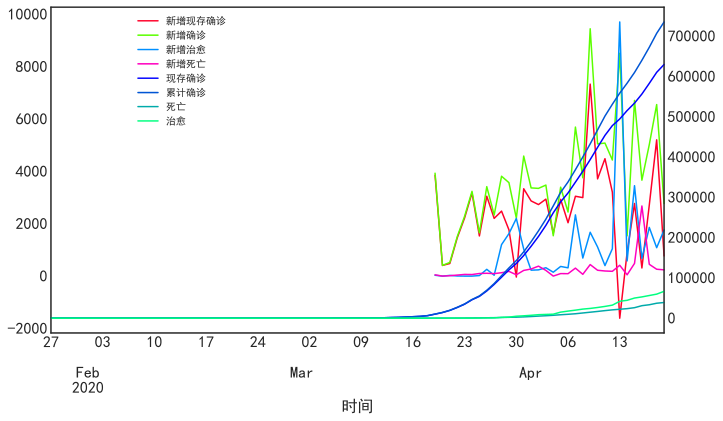

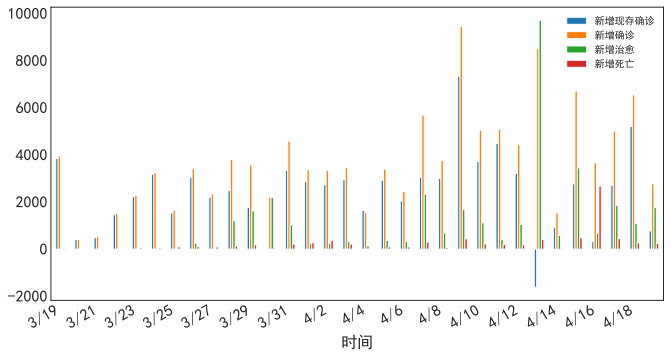

In [229]:
# 准备数据
df = pd.read_json('data/json/DXYArea-TimeSeries.json')
# 过滤
df = df[df['countryName'] == '美国']
# 排序
df.sort_values(by='updateTime', ascending=False, inplace=True)
# origin=pd.Timestamp('1970-01-01 08:00:00')转换为东八区
df['updateTime'] = pd.to_datetime(df['updateTime'], unit='ms', origin=pd.Timestamp('1970-01-01 08:00:00'))

# 累计确诊数据
df_all = df[['currentConfirmedCount', 'confirmedCount', 'deadCount', 'curedCount', 'updateTime']]
df_all.set_index('updateTime', inplace=True)
df_all = df_all.resample('D').last()
df_all.fillna(0, inplace=True)
df_all.head()

# 新增确诊数据
df2 = df.set_index('updateTime')
df2 = df2['incrVo'][df2['incrVo'].notnull()]
incr_list = list(df2)
df_incr = pd.DataFrame(incr_list, index=df2.index)
df_incr = df_incr.resample('D').last()
df_incr.head()

# pd.merge合并后绘图，这里不适合，数量的基数不同

# 第二种绘图方式：pandas绘图
# 建立画布和子图
# colormap = {
#     'currentConfirmedCount': '#ff7500',
#     'confirmedCount': '#be002f',
#     'deadCount': '#395260',
#     'curedCount': '#0aa344',
#     'currentConfirmedIncr': '#ff4d4f',
#     'confirmedIncr': '#ff7a45',
#     'deadCountIncr': '#434343',
#     'curedCountIncr': '#7cb305'
# }

df_incr.index.name = '时间'
df_all.index.name = '时间'
df_incr.rename(columns={'currentConfirmedIncr':'新增现存确诊', 'confirmedIncr': '新增确诊',
                       'deadIncr': '新增死亡', 'curedIncr': '新增治愈'}, inplace=True)
df_all.rename(columns={'currentConfirmedCount':'现存确诊', 'confirmedCount': '累计确诊',
                       'deadCount': '死亡', 'curedCount': '治愈'}, inplace=True)
fig0, ax0 = plt.subplots(1, 1, figsize=(11,6))
df_incr.plot(ax=ax0, legend=False, colormap='gist_rainbow')
ax1 = ax0.twinx()
df_all.plot(ax=ax1, legend=False, colormap='winter')
fig0.legend(loc=1, bbox_to_anchor=(0.3,1), bbox_transform=ax0.transAxes, fontsize='medium')

# x轴日期格式化显示
# ticklabels = ['']*len(df_all)
# skip = len(df_all)//12
# ticklabels[::skip] = [item.strftime('%-m/%-d') for item in df_all.index[::skip]]
# ax0.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# fig0.autofmt_xdate()

# 第二种绘图方式：pandas绘图
fig, ax = plt.subplots(1, 1, figsize=(11,6))
df_incr.plot.bar(ax=ax)
ax.legend(fontsize='medium')
# x轴日期格式化显示
ticklabels = ['']*len(df_incr)
skip = len(df_incr)//12
ticklabels[::skip] = [item.strftime('%-m/%-d') for item in df_incr.index[::skip]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
fig.autofmt_xdate()

# ax2 = ax.twinx()
# ax2.plot(df_all.index, df_all['currentConfirmedCount'], color='#ff7500', marker='o', markersize=2, label='现存确诊')
# ax2.plot(df_all.index, df_all['confirmedCount'], color='#be002f', marker='o', markersize=2, label='累计确诊')
# ax2.plot(df_all.index, df_all['deadCount'], color='#395260', marker='o', markersize=2, label='死亡')
# ax2.plot(df_all.index, df_all['curedCount'], color='#0aa344', marker='o', markersize=2, label='治愈')

# ax2.bar(df_incr.index, df_incr['currentConfirmedIncr'], color='#f2be45', label='新增现存确诊')
# ax2.bar(df_incr.index, df_incr['confirmedIncr'], color='#ed5736', label='新增确诊')
# ax2.bar(df_incr.index, df_incr['deadIncr'], color='#ed5736', label='新增死亡')
# ax2.bar(df_incr.index, df_incr['curedIncr'], color='#ed5736', label='新增治愈')


# ax.set_title('美国')
# 设置刻度大小
# ax.tick_params(labelsize=10)
# 设置刻度旋转
# ax.tick_params(axis='x', rotation=30)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))

# 添加数据标签
# for a, b in zip(df['updateTime'], df['currentConfirmedCount']):
#     plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

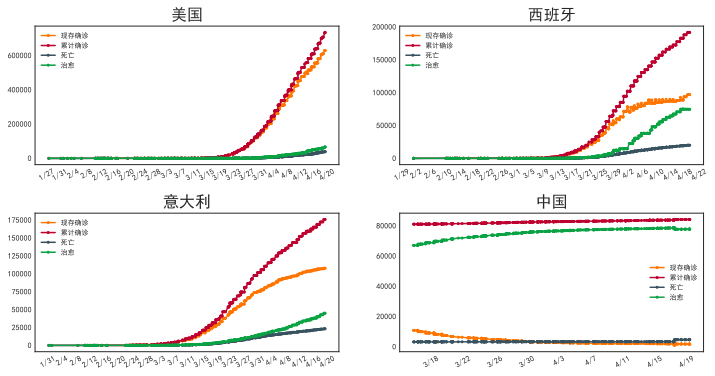

In [230]:
# 准备数据
def country_trend(df, country_name, ax):
    # 过滤
    new_df = df[(df['countryName'] == country_name) & (df['countryName'] == df['provinceName'])].copy()
    # 排序
    new_df.sort_values(by='updateTime', ascending=False, inplace=True)
    # origin=pd.Timestamp('1970-01-01 08:00:00')转换为东八区
    new_df['updateTime'] = pd.to_datetime(new_df['updateTime'], unit='ms', origin=pd.Timestamp('1970-01-01 08:00:00'))

    # 第一种绘图：plt或ax绘图
    ax.plot(new_df['updateTime'], new_df['currentConfirmedCount'], color='#ff7500', marker='o', markersize=2, label='现存确诊')
    ax.plot(new_df['updateTime'], new_df['confirmedCount'], color='#be002f', marker='o', markersize=2, label='累计确诊')
    ax.plot(new_df['updateTime'], new_df['deadCount'], color='#395260', marker='o', markersize=2, label='死亡')
    ax.plot(new_df['updateTime'], new_df['curedCount'], color='#0aa344', marker='o', markersize=2, label='治愈')
    ax.legend(loc='best', fontsize='x-small')
    ax.set_title(country_name)
    # 设置刻度大小
    ax.tick_params(labelsize=8)
    # 设置刻度旋转
    ax.tick_params(axis='x', rotation=30)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))

df = pd.read_json('data/json/DXYArea-TimeSeries.json')
country_list = ['美国', '西班牙', '意大利', '中国']
fig, axes = plt.subplots(len(country_list)//2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.35)
for i, country_name in enumerate(country_list):
    country_trend(df, country_name, axes[i//2, 0 if i%2 == 0 else 1])

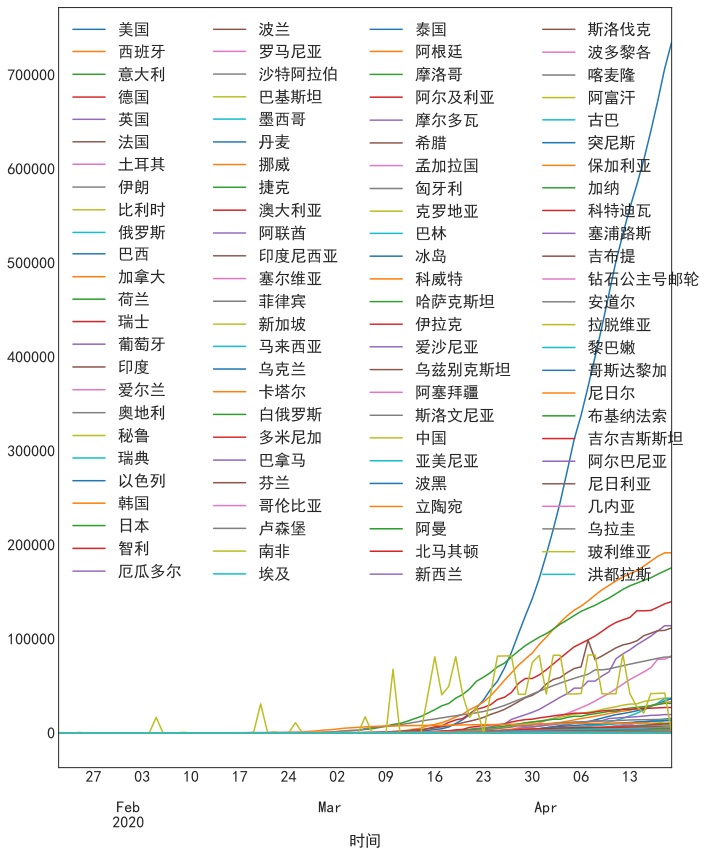

In [231]:
# 准备数据
df = pd.read_json('data/json/DXYArea-TimeSeries.json')
# 格式化时间
df['updateTime'] = pd.to_datetime(df['updateTime'], unit='ms', origin=pd.Timestamp('1970-01-01 08:00:00'))
# 透视表
df2 = df.pivot_table(index=['countryName', 'updateTime'], fill_value=0).sort_index(axis=1, ascending=False)
# statck：堆叠，unstack：不堆叠
df3 = df2.unstack('countryName')
# 重采样
df4 = df3['confirmedCount'].resample('D').last()
# 排序
df4.sort_values(by=df4.iloc[-1].name, axis=1, ascending=False, inplace=True)
# 填充缺失数据
df4.fillna(0, inplace=True)

df4.index.name = '时间'
# 绘图
fig, ax = plt.subplots(1, 1, figsize=(11, 14))
df4.iloc[:, :100].plot(ax=ax)
ax.legend(loc="upper left", ncol=len(df4.columns)%5)